In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 131304 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

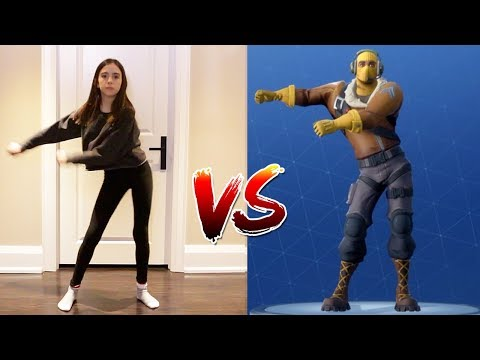

In [5]:
YOUTUBE_ID = 'RXABo9hm8B8'


YouTubeVideo(YOUTUBE_ID)

In [6]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

[youtube] RXABo9hm8B8: Downloading webpage
[youtube] RXABo9hm8B8: Downloading video info webpage
[download] Destination: youtube.mp4
[download] 100% of 77.42MiB in 00:01
ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libs

In [7]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.

In [2]:
!cd openpose && ./build/examples/openpose/openpose.bin --help

openpose.bin: Warning: SetUsageMessage() never called

  Flags from /build/gflags-6Vsjoz/gflags-2.2.1/src/gflags.cc:
    -flagfile (load flags from file) type: string default: ""
    -fromenv (set flags from the environment [use 'export FLAGS_flag1=value'])
      type: string default: ""
    -tryfromenv (set flags from the environment if present) type: string
      default: ""
    -undefok (comma-separated list of flag names that it is okay to specify on
      the command line even if the program does not define a flag with that
      name.  IMPORTANT: flags in this list that have arguments MUST use the
      flag=value format) type: string default: ""

  Flags from /build/gflags-6Vsjoz/gflags-2.2.1/src/gflags_completions.cc:
    -tab_completion_columns (Number of columns to use in output for tab
      completion) type: int32 default: 80
    -tab_completion_word (If non-empty, HandleCommandLineCompletions() will
      hijack the process and attempt to do bash-style command line flag
  

In [4]:
!cd openpose && ./build/examples/openpose/openpose.bin --hand --face --image_dir ../../  --display 0  --write_images ../result_images.jpg

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 6.961197 seconds.


In [13]:
!cd openpose && ./build/examples/openpose/openpose.bin --body 0 --hand --hand_detector 3 --image_dir ../../  --display 0  --write_images ../result_images.jpg

Starting OpenPose demo...
Configuring OpenPose...
/content/openpose/src/openpose/utilities/flagsToOpenPose.cpp:flagsToProducer():200
/content/openpose/src/openpose/utilities/flagsToOpenPose.cpp:flagsToProducerType():163
/content/openpose/src/openpose/utilities/flagsToOpenPose.cpp:flagsToPoseMode():11
/content/openpose/src/openpose/utilities/flagsToOpenPose.cpp:flagsToPoseModel():32
/content/openpose/src/openpose/utilities/flagsToOpenPose.cpp:flagsToScaleMode():85
/content/openpose/src/openpose/utilities/flagsToOpenPose.cpp:flagsToHeatMapScaleMode():114
/content/openpose/src/openpose/utilities/flagsToOpenPose.cpp:flagsToDetector():140
/content/openpose/src/openpose/utilities/flagsToOpenPose.cpp:flagsToDetector():140
Starting thread(s)...
/content/openpose/include/openpose/wrapper/wrapperAuxiliary.hpp:configureThreadManager():98
/content/openpose/src/openpose/producer/producer.cpp:createProducer():413
/content/openpose/src/openpose/wrapper/wrapperAuxiliary.cpp:wrapperConfigureSanityCheck

In [54]:
!pwd
#!cd ../../content/openpose/build/examples/tutorial_api_cpp/ && ls -a
!chmod 744 ../../content/openpose/examples/tutorial_api_python/07_hand_from_image.py && ../../content/openpose/examples/tutorial_api_python/07_hand_from_image.py --body 0 --hand --hand_detector 2 --display 0 --write_images ../result_images.jpg

/content
../../content/openpose/examples/tutorial_api_python/07_hand_from_image.py: line 3: import: command not found
../../content/openpose/examples/tutorial_api_python/07_hand_from_image.py: line 4: import: command not found
../../content/openpose/examples/tutorial_api_python/07_hand_from_image.py: line 5: import: command not found
from: can't read /var/mail/sys
../../content/openpose/examples/tutorial_api_python/07_hand_from_image.py: line 7: import: command not found
../../content/openpose/examples/tutorial_api_python/07_hand_from_image.py: line 8: import: command not found
../../content/openpose/examples/tutorial_api_python/07_hand_from_image.py: line 11: syntax error near unexpected token `('
../../content/openpose/examples/tutorial_api_python/07_hand_from_image.py: line 11: `dir_path = os.path.dirname(os.path.realpath(__file__))'


In [36]:
#import glob
#print(glob.glob('../../content/openpose/build/examples/tutorial_api_cpp/*'))
!pwd

/content
